In [59]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
from ISLP import load_data

In [60]:
from pygam import s as s_gam, LinearGAM
from ISLP.pygam import (plot as plot_gam)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV


In [61]:
College  = load_data('College')
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [62]:
College['Private'] = College['Private'].map({ 'Yes': 1, 'No': 0 })

X = College[College.columns.drop(['Outstate'])]
X

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,6510,630,2115,96,96,5.8,49,40386,99


In [63]:
y = College['Outstate']
y

0       7440
1      12280
2      11250
3      12960
4       7560
       ...  
772     6797
773    11520
774     6900
775    19840
776     4990
Name: Outstate, Length: 777, dtype: int64

### (a)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [65]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)
sfs = SequentialFeatureSelector(ridge, direction='forward')
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06])))

In [66]:
selected_features = X.columns[sfs.get_support()]
selected_features

Index(['Top10perc', 'F.Undergrad', 'P.Undergrad', 'Room.Board', 'Personal',
       'PhD', 'Expend', 'Grad.Rate'],
      dtype='object')

### (b)

C:\Users\User\AppData\Local\Temp\ipykernel_11788\175201826.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_11788\175201826.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_11788\175201826.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_11788\175201826.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_11788\175201826.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_11788\175201826.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_11788\175201826.py:8: UserWarning: FigureCanv

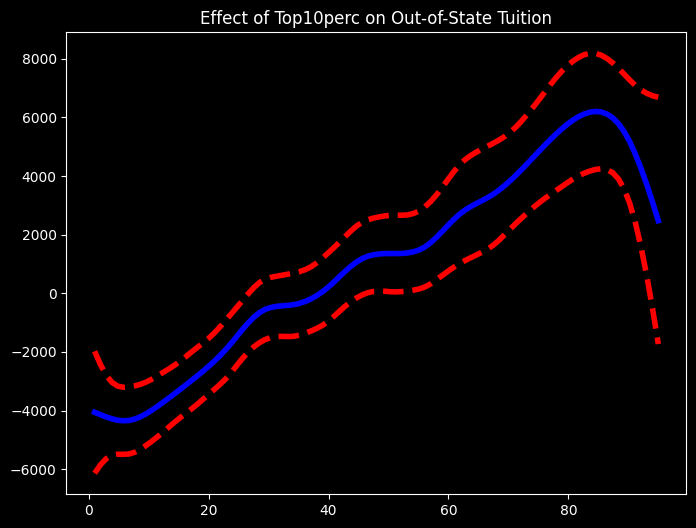

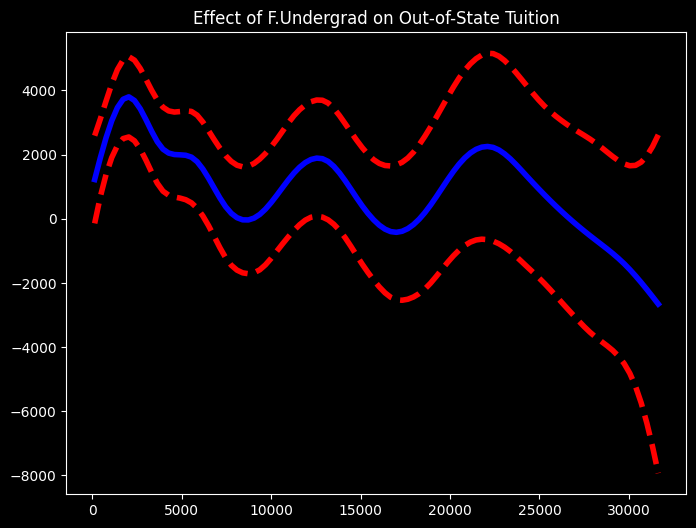

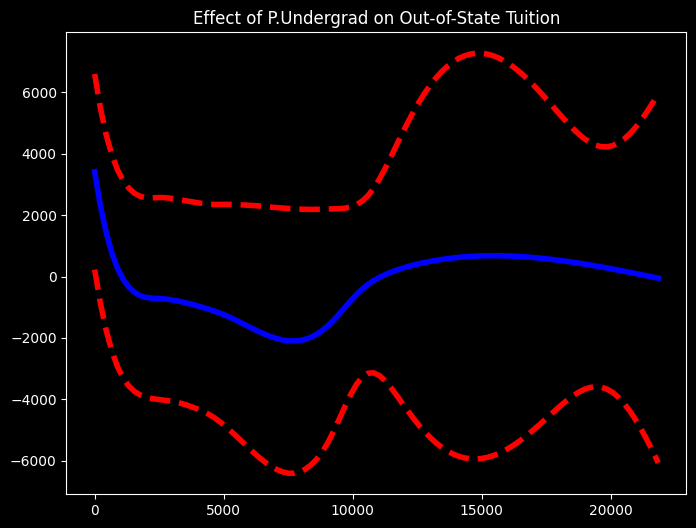

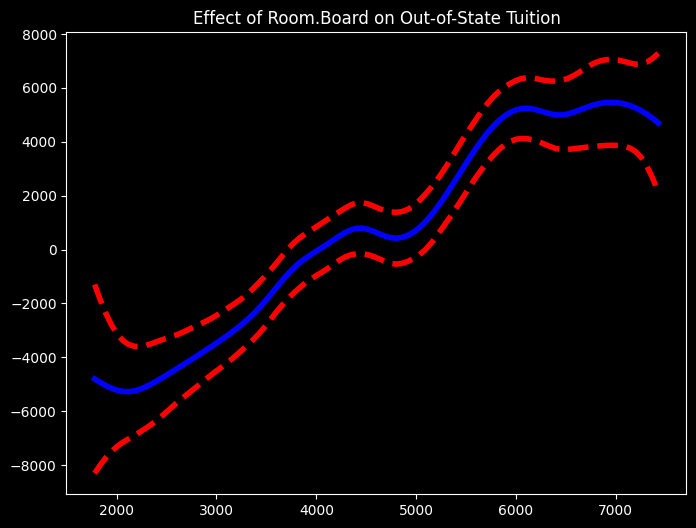

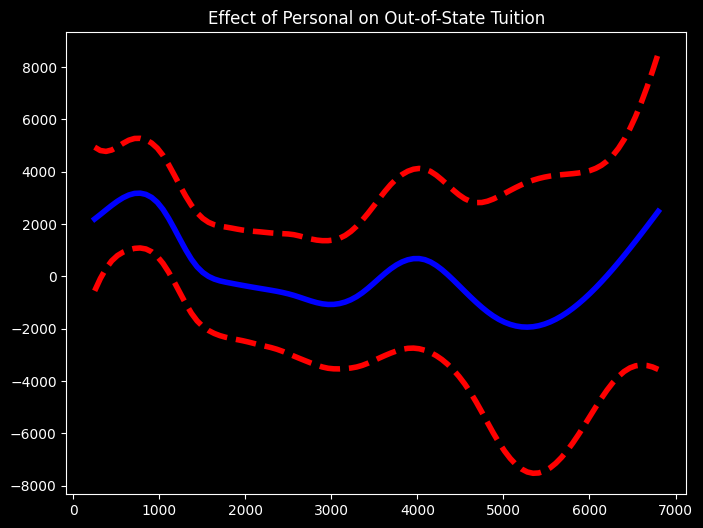

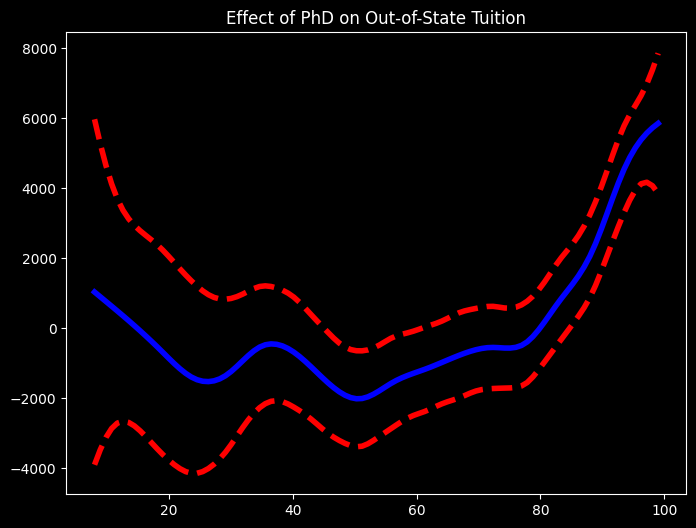

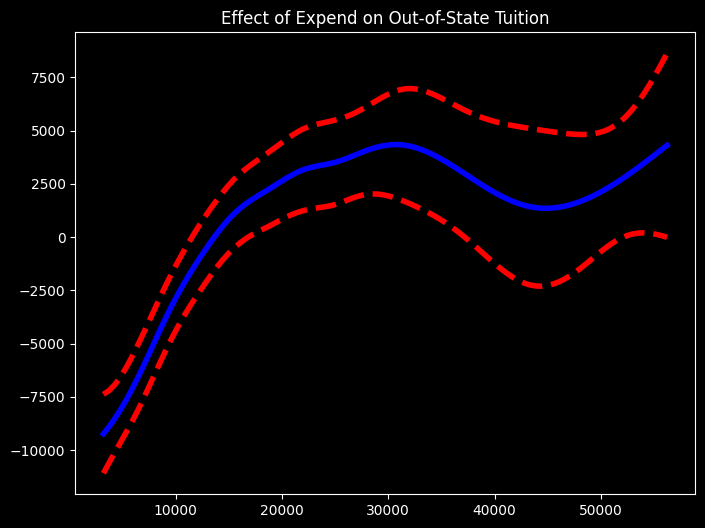

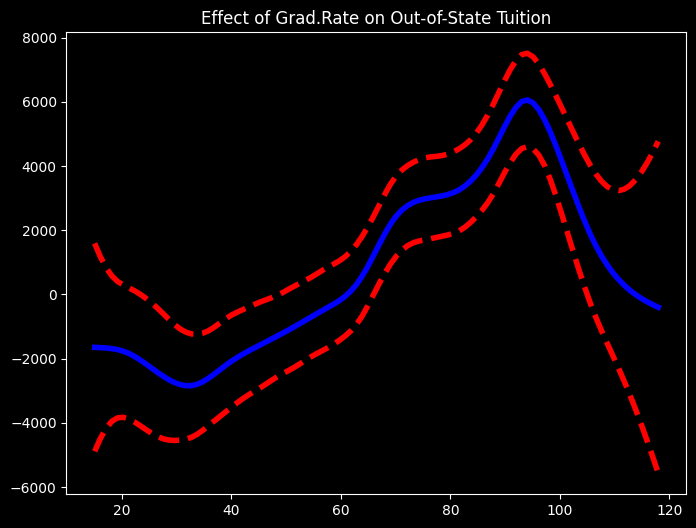

In [67]:
for feature in selected_features:
    gam = LinearGAM(s_gam(0, lam=0.6))
    gam.fit(X_train[[feature]], y_train) 
        
    fig, ax = subplots(1, 1, figsize=(8, 6))
    ax.set_title(f"Effect of {feature} on Out-of-State Tuition")
    plot_gam(gam, 0, ax=ax)    
    fig.show()

### (c)

In [68]:
gam_8 = LinearGAM(s_gam(0) + s_gam(1) + s_gam(2) + s_gam(3) + s_gam(4) + s_gam(5) + s_gam(6) + s_gam(7)).fit(X_train[selected_features], y_train)
y_pred = gam_8.predict(X_test[selected_features])

In [69]:
gam_8.summary()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      75.346
Link Function:                     IdentityLink Log Likelihood:                                 -8714.4642
Number of Samples:                          543 AIC:                                            17581.6206
                                                AICc:                                            17606.983
                                                GCV:                                          4937708.4293
                                                Scale:                                        3722099.4629
                                                Pseudo R-Squared:                                   0.7974
Feature Function                  Lam

C:\Users\User\AppData\Local\Temp\ipykernel_11788\2318592025.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_8.summary()


### We obtain a test R-squared of 80% using GAM with 8 predictors. 

In [70]:
y_pred

array([12403.75215008, 17194.77719984, 12213.11407009,  9710.87303672,
       13820.30651189,  9439.15994324, 11910.87662062, 10881.10299399,
        6506.42482145, 13132.85146607, 13403.46786479,  5810.86445851,
       15624.12202086, 18854.28751009,  6772.77337774,  8003.11299682,
        3734.06997302,  8623.2363948 ,  8781.79753838,  8909.92818997,
        8970.84380291, 17031.87119443,  7277.92196153,  9500.49183293,
        8046.87704865,  4426.14252665,  8008.06402889, 19890.49108966,
       15023.71369887, 12112.80255894,  5594.0074234 ,  9407.0160926 ,
        9120.01210338,  4868.32007494, 19204.34067023,  8982.72331982,
        8752.53833751, 12420.26319677, 12428.61129536, 12578.40737272,
       10270.64537396,  3228.01181499, 19687.80149059, 11533.16155574,
       13995.24378396,  6232.10900262,  7733.26275815,  5907.67506406,
       16421.42096592,  7976.41566948,  9859.70167822,  1803.45909435,
       17993.12326684, 10157.5819276 ,  7769.02049172, 12514.20246708,
      

### (d)

We can assess a non-linearity by the plots from (b).

All the plots except *Top10perc* and *Room.Board* shows a curve, this indicates that the relationship between the predictor and the response is non-linear.